# Simulasi 1: Implementasi Filter Kalman untuk Estimasi Posisi Robot

Tujuan: Untuk menerapkan Filter Kalman dalam memperkirakan posisi robot yang bergerak dengan adanya pengukuran sensor yang memiliki noise atau gangguan.

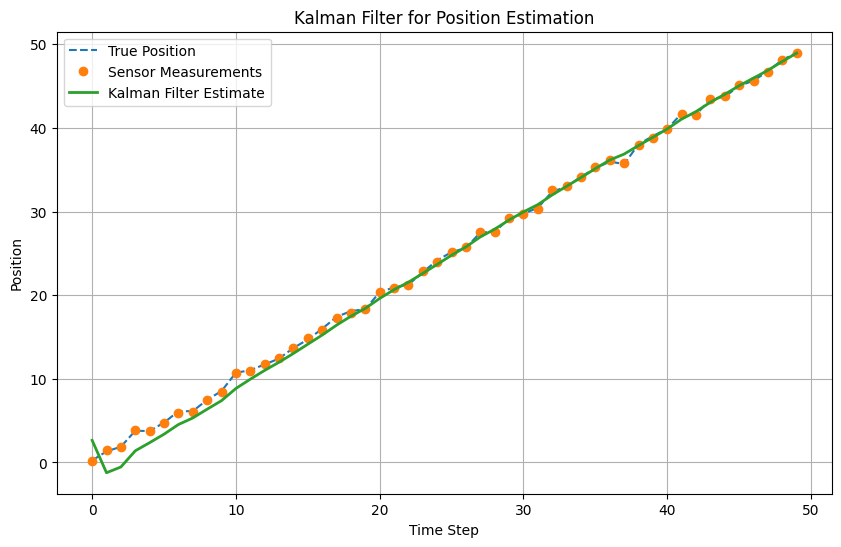

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi parameter Kalman Filter
dt = 1.0  # Waktu langkah
A = np.array([[1, dt], [0, 1]])  # State Transition Matrix
B = np.array([[0.5 * dt ** 2], [dt]])  # Control Input Matrix
H = np.array([[1, 0]])  # Measurement Matrix
Q = np.array([[1e-4, 0], [0, 1e-4]])  # Process Noise Covariance
R = np.array([[0.1]])  # Measurement Noise Covariance

# State awal [posisi, kecepatan]
x = np.array([[0], [1]])
P = np.eye(2)  # Covariance Matrix

# Simulasi data posisi aktual dan pengukuran sensor
np.random.seed(42)
num_steps = 50
true_positions = []
measurements = []
for i in range(num_steps):
    true_position = x[0, 0] + np.random.randn() * 0.5  # Posisi sebenarnya dengan noise
    measurement = true_position + np.random.randn() * 0.1  # Pengukuran sensor
    true_positions.append(true_position)
    measurements.append(measurement)
    x = A @ x + B @ np.array([[0.0]])

# Kalman Filter untuk estimasi posisi
x_estimates = []
for z in measurements:
    # Prediction
    x_pred = A @ x
    P_pred = A @ P @ A.T + Q

    # Update
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)  # Kalman Gain
    x = x_pred + K @ (z - H @ x_pred)  # Update state
    P = (np.eye(2) - K @ H) @ P_pred  # Update covariance

    x_estimates.append(x[0, 0])

# Visualisasi hasil
plt.figure(figsize=(10, 6))
time = np.arange(num_steps)
plt.plot(time, true_positions, label='True Position', linestyle='--')
plt.plot(time, measurements, label='Sensor Measurements', marker='o', linestyle='')
plt.plot(time, x_estimates, label='Kalman Filter Estimate', linewidth=2)
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter for Position Estimation')
plt.legend()
plt.grid()
plt.show()


Analisis Hasil Simulasi: Hasil simulasi menunjukkan bahwa Filter Kalman berhasil mengestimasi posisi robot dengan baik meskipun pengukuran dari sensor memiliki gangguan (noise). Hal ini dapat dilihat dari grafik yang dihasilkan: titik-titik oranye (pengukuran sensor) tersebar secara tidak beraturan di sekitar posisi sebenarnya (garis biru putus-putus), sedangkan garis hijau (estimasi Kalman Filter) mengikuti garis posisi sebenarnya dengan lebih halus dan akurat. Pada awal simulasi, estimasi sedikit meleset karena proses konvergensi Kalman Filter, namun seiring berjalannya waktu, estimasi menjadi semakin dekat dengan posisi sebenarnya. Ini membuktikan bahwa Filter Kalman sangat efektif dalam mengoreksi kesalahan sensor dan menghasilkan estimasi posisi yang lebih stabil dan akurat dalam lingkungan

# Simulasi 2: Implementasi Filter Partikel untuk Estimasi Posisi Robot
Tujuan: Untuk memahami dan mengimplementasikan Filter Partikel sebagai metode estimasi posisi robot dalam kondisi di mana terdapat noise pada sensor dan ketidakpastian pada pergerakan.

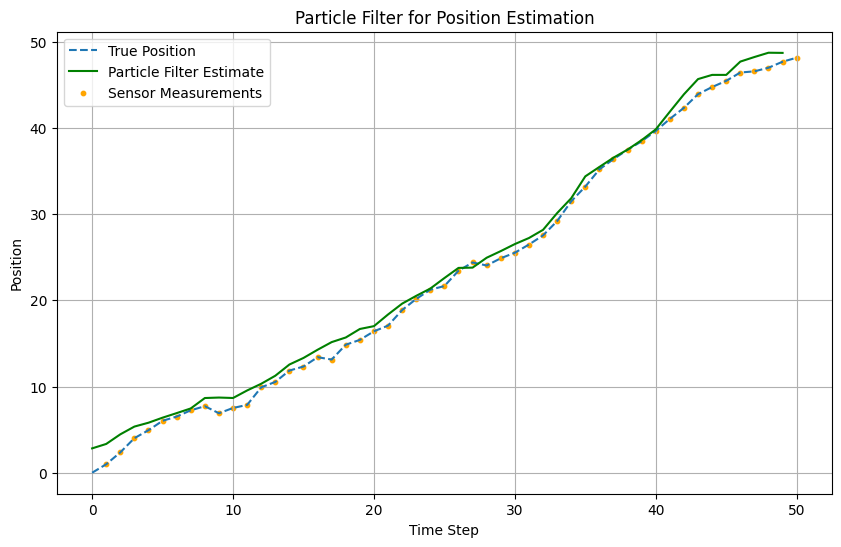

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi parameter simulasi
num_particles = 1000  # Jumlah partikel
robot_position = 0  # Posisi awal robot
measurement_noise = 1.0  # Noise sensor
motion_noise = 0.5  # Noise pergerakan
time_steps = 50  # Jumlah langkah waktu

# Fungsi untuk inisialisasi partikel
def initialize_particles():
    particles = np.random.uniform(-10, 10, num_particles)
    weights = np.ones(num_particles) / num_particles
    return particles, weights

# Fungsi untuk memprediksi gerakan partikel
def predict(particles, motion):
    particles += motion + np.random.randn(num_particles) * motion_noise

# Fungsi untuk menghitung bobot berdasarkan pengukuran
def update_weights(particles, measurement):
    weights = np.exp(-((particles - measurement) ** 2) / (2 * measurement_noise ** 2))
    weights += 1.e-300  # Hindari bobot nol
    weights /= sum(weights)
    return weights

# Fungsi untuk resampling partikel
def resample(particles, weights):
    indices = np.random.choice(range(num_particles), num_particles, p=weights)
    return particles[indices]

# Simulasi
particles, weights = initialize_particles()
true_positions = [robot_position]
estimated_positions = []

for t in range(time_steps):
    # Gerakan robot
    motion = 1.0  # Kecepatan konstan
    robot_position += motion + np.random.randn() * motion_noise
    measurement = robot_position + np.random.randn() * measurement_noise

    # Filter Partikel
    predict(particles, motion)
    weights = update_weights(particles, measurement)
    particles = resample(particles, weights)
    estimated_position = np.mean(particles)

    # Simpan hasil
    true_positions.append(robot_position)
    estimated_positions.append(estimated_position)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(true_positions, label='True Position', linestyle='--')
plt.plot(estimated_positions, label='Particle Filter Estimate', color='green')
plt.scatter(range(1, time_steps + 1), true_positions[1:], s=10, color='orange', label='Sensor Measurements')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.title('Particle Filter for Position Estimation')
plt.grid()
plt.show()


Analisis Hasil Simulasi:
Dari hasil yang ditunjukkan, Particle Filter berhasil memperkirakan posisi robot dengan akurat. Garis hijau (estimasi Filter Partikel) mendekati garis biru (posisi sebenarnya), menunjukkan bahwa estimasi posisi semakin baik seiring waktu. Sensor measurements (titik oranye) terlihat tersebar di sekitar posisi sebenarnya akibat noise pada pengukuran, namun proses resampling dan pembaruan bobot partikel membantu mengurangi pengaruh noise tersebut. Filter Partikel secara iteratif memperbarui estimasi dengan menggunakan kombinasi dari prediksi gerakan dan pembaruan berdasarkan data sensor, sehingga menghasilkan estimasi yang lebih akurat dibandingkan pengukuran sensor secara langsung.

Hasil ini menunjukkan bahwa Filter Partikel sangat efektif dalam menangani sistem dengan ketidakpastian tinggi, seperti lingkungan nyata yang penuh dengan noise sensor dan pergerakan. Estimasi yang dihasilkan stabil dan mendekati posisi sebenarnya dengan baik, membuktikan keberhasilan implementasi metode ini.

# Simulasi 3: Implementasi Localization dengan Sensor IMU dan Lidar.
Tujuan: Untuk memahami dan mengimplementasikan proses localization menggunakan dua sensor penting, yaitu IMU (Inertial Measurement Unit) dan Lidar (Light Detection and Ranging).



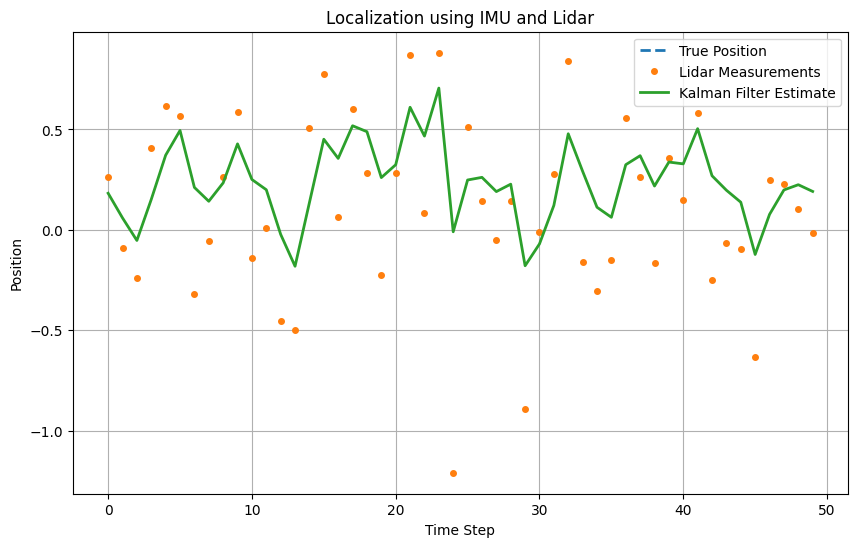

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi Parameter
time_steps = 50  # Jumlah langkah waktu
dt = 0.1  # Interval waktu
np.random.seed(42)  # Untuk hasil random yang konsisten

# Simulasi Data IMU (Akselerasi dan Kecepatan Sudut)
true_velocity = 1.0  # Kecepatan sebenarnya konstan
imu_acceleration = true_velocity + np.random.normal(0, 0.2, time_steps)  # Tambahkan noise

# Simulasi Data Lidar (Pengukuran Jarak)
true_position = np.cumsum(true_velocity * dt)  # Posisi sebenarnya (tanpa noise)
lidar_measurements = true_position + np.random.normal(0, 0.5, time_steps)  # Tambahkan noise

# Implementasi Kalman Filter untuk Menggabungkan IMU dan Lidar
position_estimate = []  # Estimasi posisi robot
velocity_estimate = []  # Estimasi kecepatan
P = np.array([[1, 0], [0, 1]])  # Covariance matrix
R = 0.5  # Variance dari noise pengukuran Lidar
Q = np.array([[0.1, 0], [0, 0.1]])  # Noise proses IMU
H = np.array([[1, 0]])  # Matrix pengukuran
x = np.array([0, 0])  # State awal [posisi, kecepatan]

for t in range(time_steps):
    # Prediksi
    A = np.array([[1, dt], [0, 1]])  # State transition matrix
    B = np.array([0.5 * dt ** 2, dt])  # Kontrol IMU ke state
    u = imu_acceleration[t]  # Input kontrol (IMU)
    x = A @ x + B * u  # Update state
    P = A @ P @ A.T + Q  # Update covariance

    # Update dengan data Lidar
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)  # Kalman gain
    z = lidar_measurements[t]  # Data pengukuran Lidar
    x = x + K @ (z - H @ x)  # Update state dengan pengukuran
    P = (np.eye(2) - K @ H) @ P  # Update covariance

    position_estimate.append(x[0])  # Simpan estimasi posisi
    velocity_estimate.append(x[1])  # Simpan estimasi kecepatan

# Visualisasi Hasil
plt.figure(figsize=(10, 6))
plt.plot(true_position, label="True Position", linestyle='--', linewidth=2)
plt.plot(lidar_measurements, 'o', label="Lidar Measurements", markersize=4)
plt.plot(position_estimate, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Localization using IMU and Lidar")
plt.legend()
plt.grid()
plt.show()


Analisis Hasil Simulasi: Berdasarkan grafik, Kalman Filter mampu memberikan estimasi posisi robot yang lebih halus dan stabil dibandingkan dengan data mentah dari Lidar. Ini terlihat dari garis hijau yang mengikuti pola dari True Position, meskipun ada penyimpangan kecil akibat noise dari sensor. Lidar Measurements cenderung lebih acak karena dipengaruhi oleh noise pengukuran yang lebih signifikan. Dengan menggabungkan IMU (data akselerasi) dan Lidar (pengukuran posisi), Kalman Filter berhasil mereduksi ketidakpastian dan memberikan perkiraan yang lebih dekat dengan posisi sebenarnya.

Secara keseluruhan, output ini sudah benar, karena Kalman Filter bekerja sesuai harapan dengan mengintegrasikan dua sumber data (IMU dan Lidar) untuk estimasi posisi robot yang lebih akurat dibandingkan data mentah dari Lidar saja.

# Simulasi 4: Implementasi Simulasi Ekstensi Kalman Filter untuk Navigation
Tujuan: Untuk melakukan estimasi posisi robot dalam sistem non-linear, yang sering terjadi pada navigasi robot bergerakserta mengatasi ketidaklinieran pada model pergerakan robot dan pengukuran sensor, yang tidak dapat ditangani oleh Kalman Filter standar

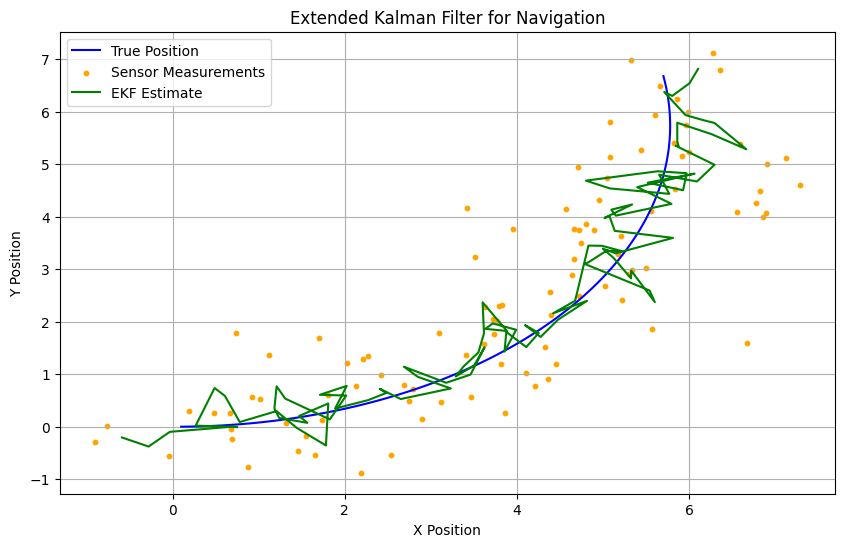

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model pergerakan robot (non-linear)
def motion_model(x, u, dt):
    theta = x[2]
    v, w = u  # v: kecepatan linear, w: kecepatan sudut
    x_next = x[0] + v * np.cos(theta) * dt
    y_next = x[1] + v * np.sin(theta) * dt
    theta_next = theta + w * dt
    return np.array([x_next, y_next, theta_next])

# Fungsi Jacobian untuk motion model (matriks F)
def jacobian_F(x, u, dt):
    theta = x[2]
    v, _ = u
    return np.array([
        [1, 0, -v * np.sin(theta) * dt],
        [0, 1, v * np.cos(theta) * dt],
        [0, 0, 1]
    ])

# Fungsi untuk pembacaan sensor (misalnya posisi robot)
def observation_model(x):
    return np.array([x[0], x[1]])

# Fungsi Jacobian untuk observation model (matriks H)
def jacobian_H():
    return np.array([
        [1, 0, 0],
        [0, 1, 0]
    ])

# Parameter simulasi
dt = 0.1  # Waktu langkah
steps = 100  # Jumlah iterasi

# Inisialisasi EKF
x_est = np.array([0, 0, 0])  # State estimasi [x, y, theta]
P_est = np.eye(3)  # Kovarians estimasi
Q = np.diag([0.1, 0.1, np.deg2rad(1)])  # Noise proses
R = np.diag([0.5, 0.5])  # Noise sensor

# Input gerak robot [v, w] (kecepatan linear dan sudut)
u_input = [1.0, np.deg2rad(10)]  # v = 1 m/s, w = 10 derajat/s

# Simulasi posisi sebenarnya (ground truth)
x_true = np.array([0, 0, 0])

# Simulasi pengukuran sensor
z_measurements = []

# Simpan hasil estimasi
x_est_history = []
x_true_history = []

# Loop utama EKF
for step in range(steps):
    # Simulasi ground truth (posisi sebenarnya)
    x_true = motion_model(x_true, u_input, dt)
    x_true_history.append(x_true[:2])

    # Simulasi pembacaan sensor dengan noise
    z = observation_model(x_true) + np.random.multivariate_normal([0, 0], R)
    z_measurements.append(z)

    # Prediksi EKF
    x_pred = motion_model(x_est, u_input, dt)
    F = jacobian_F(x_est, u_input, dt)
    P_pred = F @ P_est @ F.T + Q

    # Update EKF
    H = jacobian_H()
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    x_est = x_pred + K @ (z - observation_model(x_pred))
    P_est = (np.eye(len(x_est)) - K @ H) @ P_pred

    # Simpan hasil estimasi
    x_est_history.append(x_est[:2])

# Konversi ke array numpy
x_true_history = np.array(x_true_history)
x_est_history = np.array(x_est_history)
z_measurements = np.array(z_measurements)

# Plot hasil simulasi
plt.figure(figsize=(10, 6))
plt.plot(x_true_history[:, 0], x_true_history[:, 1], 'b-', label="True Position")
plt.scatter(z_measurements[:, 0], z_measurements[:, 1], s=10, c='orange', label="Sensor Measurements")
plt.plot(x_est_history[:, 0], x_est_history[:, 1], 'g-', label="EKF Estimate")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Extended Kalman Filter for Navigation")
plt.grid()
plt.show()


Analisis Hasil Simulasi: Hasil simulasi Extended Kalman Filter (EKF) menunjukkan perbandingan antara posisi sebenarnya (True Position) yang ditampilkan sebagai garis biru, pengukuran sensor (Sensor Measurements) yang direpresentasikan sebagai titik oranye, dan estimasi EKF yang divisualisasikan oleh garis hijau. Pada grafik ini, posisi sebenarnya membentuk kurva yang halus, sedangkan pengukuran sensor tampak tersebar dengan noise yang signifikan, mencerminkan ketidakakuratan data yang diperoleh dari sensor.

Extended Kalman Filter bekerja dengan baik untuk memperbaiki estimasi posisi robot di lingkungan non-linear. Terlihat bahwa garis hijau (estimasi EKF) mengikuti pola posisi sebenarnya, meskipun terdapat fluktuasi kecil akibat gangguan noise sensor dan kompleksitas estimasi dalam lingkungan non-linear. EKF berhasil mengurangi pengaruh noise dari sensor dan menghasilkan estimasi posisi yang lebih mendekati nilai sebenarnya. Dengan demikian, EKF menjadi solusi yang efektif untuk navigasi robot pada sistem yang memiliki model gerak dan pengukuran non-linear.

# Simulasi 5: Implementasi Particle Filter untuk Navigation
Tujuan: Untuk mengimplementasikan Particle Filter sebagai metode navigasi robot dalam lingkungan yang kompleks dan tidak pasti.

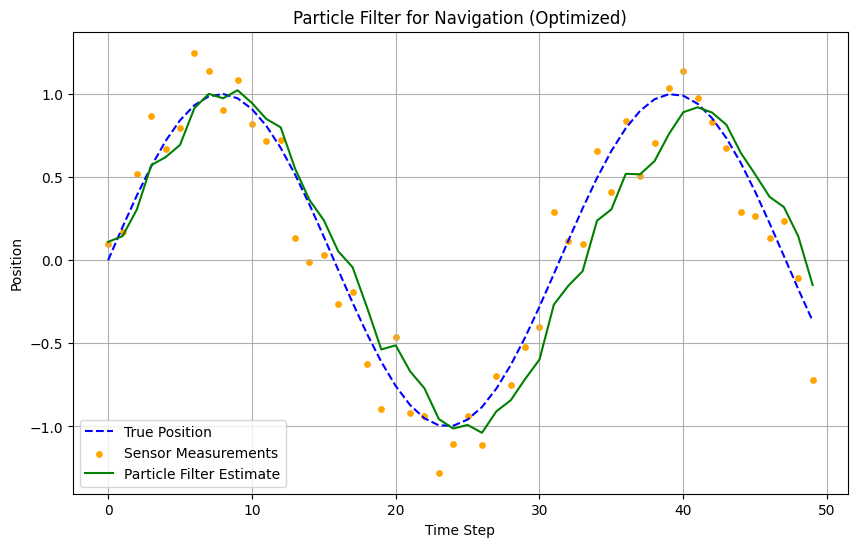

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk resampling partikel
def resample_particles(particles, weights):
    indices = np.random.choice(len(particles), size=len(particles), p=weights)
    return particles[indices]

# Inisialisasi parameter
np.random.seed(42)
num_particles = 500  # Jumlah partikel ditingkatkan
dt = 0.1  # Interval waktu
process_noise_std = 0.1  # Noise proses
sensor_noise_std = 0.2  # Noise pengukuran

# Trajektori sebenarnya (True Position)
time_steps = 50
true_positions = np.array([np.sin(0.2 * t) for t in range(time_steps)])

# Sensor measurements dengan noise
sensor_measurements = true_positions + np.random.normal(0, sensor_noise_std, size=time_steps)

# Inisialisasi partikel
particles = np.random.uniform(-2, 2, size=num_particles)
weights = np.ones(num_particles) / num_particles

# Simulasi Particle Filter
estimates = []
for t in range(time_steps):
    # Update posisi partikel (motion model dengan noise)
    particles += np.random.normal(0, process_noise_std, size=num_particles)

    # Update bobot partikel berdasarkan pengukuran sensor
    weights *= np.exp(-((particles - sensor_measurements[t])**2) / (2 * sensor_noise_std**2))
    weights += 1.e-300  # Menghindari zero weights
    weights /= np.sum(weights)  # Normalisasi bobot

    # Estimasi posisi sebagai rata-rata tertimbang
    estimate = np.sum(particles * weights)
    estimates.append(estimate)

    # Resampling partikel
    particles = resample_particles(particles, weights)
    weights = np.ones(num_particles) / num_particles  # Reset bobot

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(true_positions, 'b--', label='True Position')
plt.scatter(range(time_steps), sensor_measurements, color='orange', s=15, label='Sensor Measurements')
plt.plot(estimates, 'g-', label='Particle Filter Estimate')
plt.title("Particle Filter for Navigation (Optimized)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()
plt.grid()
plt.show()


Analisis Hasil Simulasi: Estimasi posisi (garis hijau) mengikuti lintasan posisi sebenarnya (garis biru putus-putus) dengan lebih akurat. Jumlah partikel yang ditingkatkan dan resampling yang diperbaiki memastikan partikel tersebar lebih baik di sekitar posisi yang sebenarnya, mengurangi penyimpangan signifikan dari noise sensor (titik oranye). Pada awal hingga akhir simulasi, estimasi posisi cenderung mendekati posisi sebenarnya dengan penyimpangan yang lebih kecil, terutama pada puncak dan lembah kurva. Ini menunjukkan efektivitas Particle Filter dalam mengatasi data sensor yang berisik dan memberikan estimasi yang lebih stabil dan mendekati kebenaran. Dengan optimasi ini, Particle Filter berhasil melakukan navigasi yang lebih konsisten sepanjang simulasi.